<a href="https://colab.research.google.com/github/Renita1206/Getting-Started-with-NLP/blob/main/Tweet_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

     |████████████████████████████████| 1.7 MB 6.9 MB/s 
     |████████████████████████████████| 243 kB 84.5 MB/s 


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.6.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
dataset=nlp.load_dataset("emotion")

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [ ]:
dataset

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [ ]:
train=dataset['train']
val=dataset["validation"]
test=dataset["test"]

In [ ]:
def getTweet(data):
  tweets=[x['text'] for x in data]
  labels=[x['label'] for x in data]
  return tweets,labels

In [ ]:
tweets,labels = getTweet(train)

In [ ]:
for i in range(10):
  print(tweets[i],'\t',labels[i])

i didnt feel humiliated 	 sadness
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake 	 sadness
im grabbing a minute to post i feel greedy wrong 	 anger
i am ever feeling nostalgic about the fireplace i will know that it is still on the property 	 love
i am feeling grouchy 	 anger
ive been feeling a little burdened lately wasnt sure why that was 	 sadness
ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny 	 surprise
i feel as confused about life as a teenager or as jaded as a year old man 	 fear
i have been with petronas for years i feel that petronas has performed well and made a huge profit 	 joy
i feel romantic too 	 love


## Task 4: Tokenizer

1. Tokenizing the tweets

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=10000,oov_token='<OOV>')
tokenizer.fit_on_texts(tweets)

In [ ]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

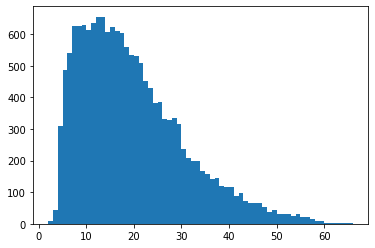

In [ ]:
length=[len(t.split(' ')) for t in tweets]
plt.hist(length, bins=len(set(length)))
plt.show()

In [ ]:
maxlen=60

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def getSeq(tokenizer,tweets):
  sequences=tokenizer.texts_to_sequences(tweets)
  padded=pad_sequences(sequences, truncating='post', padding='post',maxlen=maxlen)
  return padded

In [ ]:
padded_train=getSeq(tokenizer, tweets)

In [ ]:
padded_train[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes=set(labels)
print(classes)

{'surprise', 'fear', 'love', 'sadness', 'anger', 'joy'}


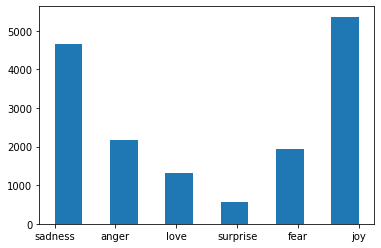

In [ ]:
plt.hist(labels, bins=11)
plt.show()

In [ ]:
class_to_index = dict((c,i) for i,c in enumerate(classes))
index_to_class = dict((v,k) for k,v in class_to_index.items())

In [ ]:
class_to_index

{'anger': 4, 'fear': 1, 'joy': 5, 'love': 2, 'sadness': 3, 'surprise': 0}

In [ ]:
index_to_class

{0: 'surprise', 1: 'fear', 2: 'love', 3: 'sadness', 4: 'anger', 5: 'joy'}

In [ ]:
name_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [ ]:
train_labels = name_to_ids(labels)
print(train_labels[0])

3


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(1000,16,input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences = True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6,activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 16)            16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 60, 40)            5920      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense (Dense)                (None, 6)                 246       
Total params: 31,926
Trainable params: 31,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
val_tweets, val_labels = getTweet(val)
val_seq = getSeq(tokenizer,val_tweets)
val_labels = name_to_ids(val_labels)

In [ ]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 3)

In [ ]:
h=model.fit(padded_train, train_labels, validation_data=(val_seq, val_labels), epochs=25)

Epoch 1/25
500/500 [==============================] - 18s 17ms/step - loss: 1.3031 - accuracy: 0.4974 - val_loss: 0.8685 - val_accuracy: 0.6795
Epoch 2/25
500/500 [==============================] - 7s 14ms/step - loss: 0.6573 - accuracy: 0.7744 - val_loss: 0.6051 - val_accuracy: 0.7900
Epoch 3/25
500/500 [==============================] - 7s 14ms/step - loss: 0.5119 - accuracy: 0.8273 - val_loss: 0.5499 - val_accuracy: 0.8210
Epoch 4/25
500/500 [==============================] - 7s 14ms/step - loss: 0.4435 - accuracy: 0.8482 - val_loss: 0.5082 - val_accuracy: 0.8280
Epoch 5/25
500/500 [==============================] - 7s 14ms/step - loss: 0.3973 - accuracy: 0.8623 - val_loss: 0.4602 - val_accuracy: 0.8430
Epoch 6/25
500/500 [==============================] - 7s 14ms/step - loss: 0.3608 - accuracy: 0.8718 - val_loss: 0.4462 - val_accuracy: 0.8490
Epoch 7/25
500/500 [==============================] - 7s 14ms/step - loss: 0.3343 - accuracy: 0.8789 - val_loss: 0.4314 - val_accuracy: 0.842

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

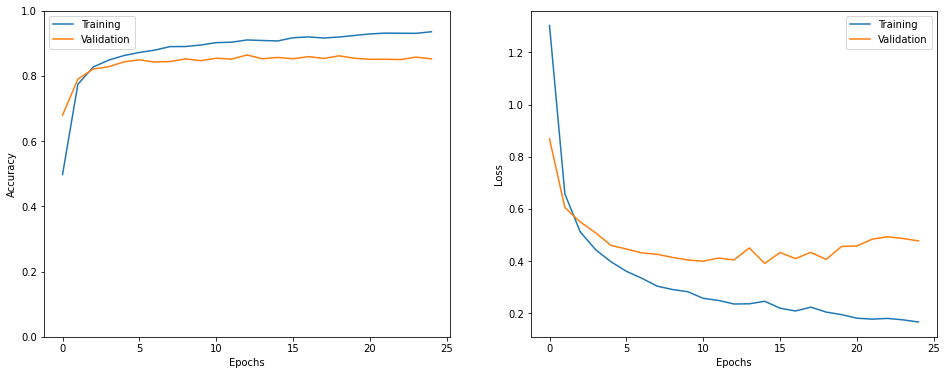

In [ ]:
show_history(h)

In [ ]:
test_tweets, test_labels = getTweet(test)
test_seq = getSeq(tokenizer,test_tweets)
test_labels = name_to_ids(test_labels)

In [ ]:
model.evaluate(test_seq, test_labels)

63/63 [==============================] - 0s 7ms/step - loss: 0.4163 - accuracy: 0.8640


[0.41627147793769836, 0.8640000224113464]

In [ ]:
i=random.randint(0,len(test_tweets))

print("Sentence: ",test_tweets[i])
print("Emotion:  ",index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i],axis=0))[0]
pred = index_to_class[np.argmax(p).astype('uint8')]

print("Predicted Emotion: ",pred)

Sentence:  i have to take jenny in to be spayed so of course im feeling nervous and guilty
Emotion:   fear
Predicted Emotion:  fear
